# 5. Explore the Data

> "I don't know, what I don't know"

We want to first **visually explore** the data to see if we can confirm some of our initial hypotheses as well as make new hypothesis about the problem we are trying to solve.

- Why do visual exploration?
- Understand Data Structure & Types
- Grammar of Graphics and Basics of visualisation
- Explore single variable graphs - (Quantitative, Categorical)
- Explore dual variable graphs - (Q & Q, Q & C, C & C)
- Explore multi-dimensional variable graphs

For this we will start by loading the data and understanding the data structure of the dataframe we have.

## Lets read the data

In [80]:
# Import the library we need, which is Pandas
import pandas as pd

You will find the variable `df` used quite often to store a `dataframe`

In [81]:
# Read the csv file of Monthwise Quantity and Price csv file we have.
df = pd.read_csv('MonthWiseMarketArrivals_clean.csv')

In [82]:
# Changing the date column to a Time Interval columnn
df.date = pd.DatetimeIndex(df.date)

### PRINCIPLE: Visual Exploration 
Lets load the libraries required for plotting in python

In [20]:
# Load the visualisation libraries - Matplotlib
import matplotlib.pyplot as plt

In [22]:
# Let us see the output plots in the notebook itself
%matplotlib inline

In [23]:
import numpy as np

In [24]:
x = np.arange(10)

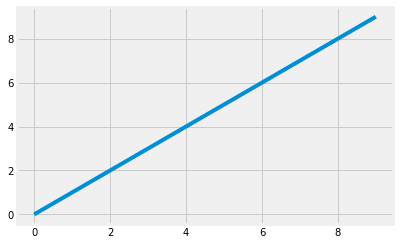

In [25]:
plt.plot(x)

In [26]:
# Set some parameters to get good visuals - style to ggplot and size to 15,10
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 7)

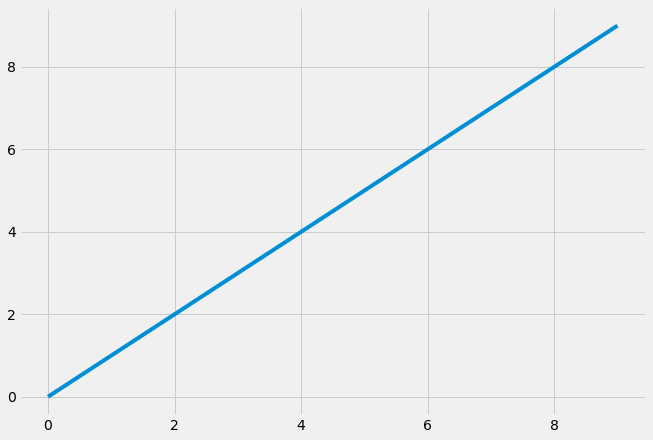

In [27]:
plt.plot(x)

### Plot the Quantity by City in 2016

In [28]:
df2016 = df[df.year == 2016]

In [29]:
df2016City = df2016.groupby(['city'], as_index=False).quantity.sum()

In [30]:
df2016City = df2016City.sort_values(by="quantity")

In [31]:
df2016City.tail(10)

,city,quantity
72,INDORE,2254330
109,MUMBAI,2872669
117,NEWASA,2897566
42,DELHI,3066639
97,LASALGAON,3402394
129,PUNE,3493535
154,SOLAPUR,3767140
126,PIMPALGAON,3836046
102,MAHUVA,6144573
15,BANGALORE,9117473


In [32]:
data=df2016.tail(20)

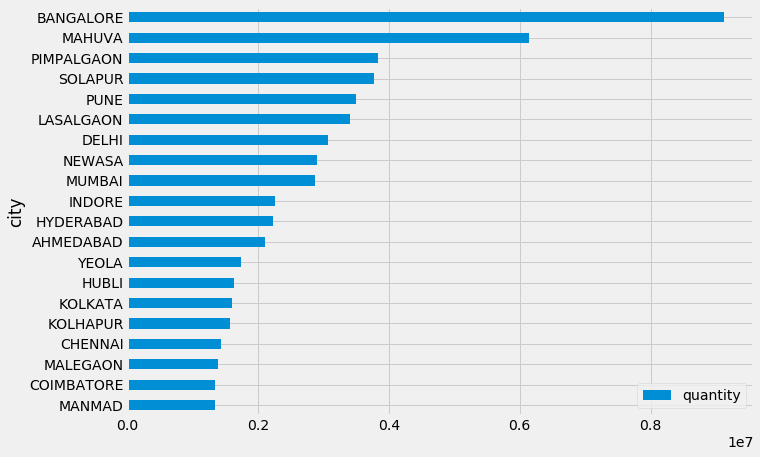

In [33]:
# Plot the Data
df2016City.tail(20).plot(kind ="barh", x = 'city', y = 'quantity')

### Exercise

Plot the quantity of Onion sold in each State for  2015

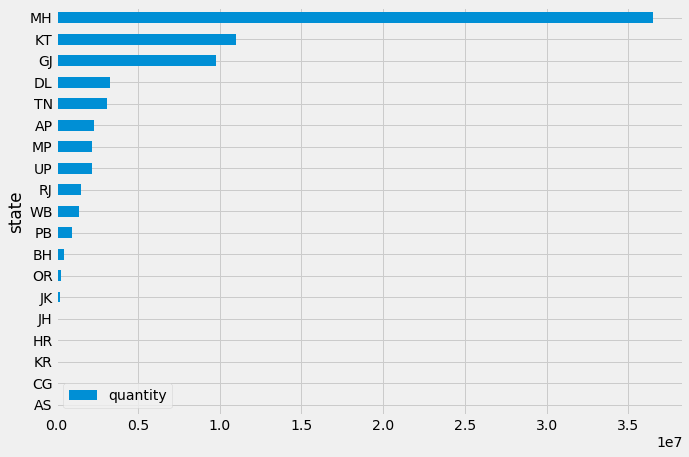

In [34]:
df2015 = df[df.year == 2015]
df2015State = df2015.groupby(['state'], as_index=False).quantity.sum()
df2015State = df2015State.sort_values(by="quantity")
df2015State.tail(20).plot(kind ="barh", x = 'state', y = 'quantity')

## Question 2 - Have the price variation in Onion prices in Bangalore really gone up over the years?

In [35]:
dfBlr = df[df.city == 'BANGALORE']
dfBlr.index
dfBlr = dfBlr.sort_values

In [36]:
# Reduce the precision of numbers - so that it is easy to read
pd.set_option('precision', 0)

### PRINCIPLE: Setting Index

In [37]:
dfBang = df[df.city == 'BANGALORE']

In [38]:
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
847,BANGALORE,January,2004,227832,916,1066,991,KT,BANGALORE,2004-01-01
848,BANGALORE,January,2005,335679,470,597,522,KT,BANGALORE,2005-01-01
849,BANGALORE,January,2006,412185,286,617,537,KT,BANGALORE,2006-01-01
850,BANGALORE,January,2007,268268,586,1167,942,KT,BANGALORE,2007-01-01
851,BANGALORE,January,2008,393806,174,671,472,KT,BANGALORE,2008-01-01


In [39]:
dfBang.index

Int64Index([ 847,  848,  849,  850,  851,  852,  853,  854,  855,  856,
            ...
             994,  995,  996,  997,  998,  999, 1000, 1001, 1002, 1003],
           dtype='int64', length=157)

In [40]:
# Set the index as date
dfBang = dfBang.sort_values(by = "date")
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
847,BANGALORE,January,2004,227832,916,1066,991,KT,BANGALORE,2004-01-01
861,BANGALORE,February,2004,225133,741,870,793,KT,BANGALORE,2004-02-01
874,BANGALORE,March,2004,221952,527,586,556,KT,BANGALORE,2004-03-01
887,BANGALORE,April,2004,185150,419,518,465,KT,BANGALORE,2004-04-01
900,BANGALORE,May,2004,137390,400,516,455,KT,BANGALORE,2004-05-01


In [41]:
# Set the Index for the Dataframe
dfBang.index = pd.PeriodIndex(dfBang.date, freq='M')

In [42]:
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
2004-01,BANGALORE,January,2004,227832,916,1066,991,KT,BANGALORE,2004-01-01
2004-02,BANGALORE,February,2004,225133,741,870,793,KT,BANGALORE,2004-02-01
2004-03,BANGALORE,March,2004,221952,527,586,556,KT,BANGALORE,2004-03-01
2004-04,BANGALORE,April,2004,185150,419,518,465,KT,BANGALORE,2004-04-01
2004-05,BANGALORE,May,2004,137390,400,516,455,KT,BANGALORE,2004-05-01


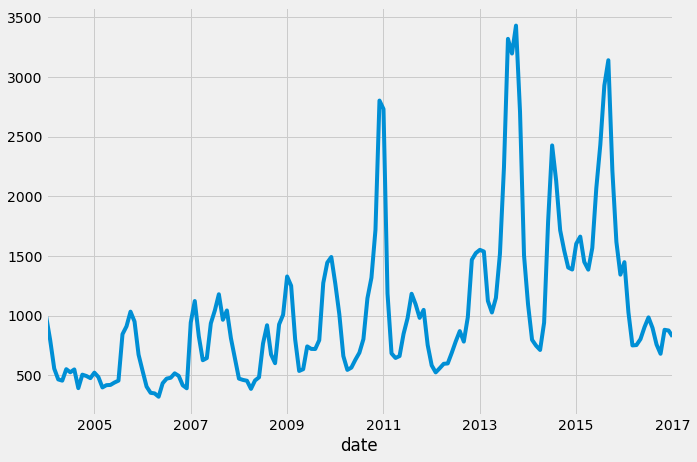

In [43]:
dfBang.priceMod.plot()

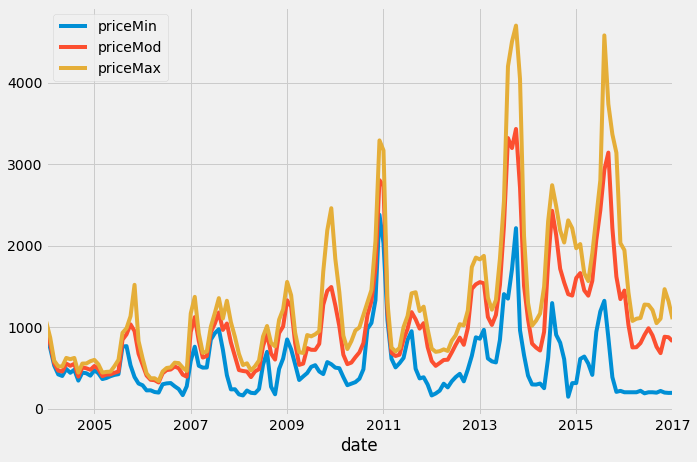

In [44]:
dfBang.plot(kind = "line", y = ['priceMin', 'priceMod', 'priceMax'])

In [45]:
dfBang['priceMinLog'] = np.log(dfBang['priceMin'])
dfBang['priceMaxLog'] = np.log(dfBang['priceMax'])
dfBang['priceModLog'] = np.log(dfBang['priceMod'])

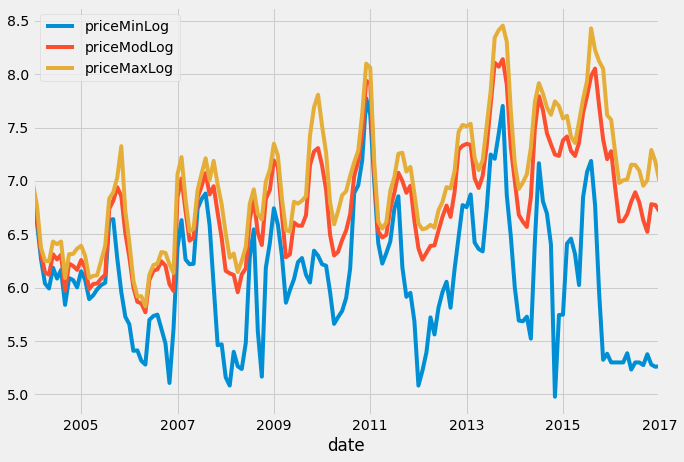

In [46]:
dfBang.plot(kind = "line", y = ['priceMinLog', 'priceModLog', 'priceMaxLog'])

To calculate the range of change, we will create a new price difference variable - which is the difference between the priceMin and priceMax

In [47]:
dfBang['priceDiff'] = dfBang['priceMax'] - dfBang['priceMin']

In [48]:
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,priceMinLog,priceMaxLog,priceModLog,priceDiff
date,,,,,,,,,,,,,,
2004-01,BANGALORE,January,2004,227832,916,1066,991,KT,BANGALORE,2004-01-01,7,7,7,150
2004-02,BANGALORE,February,2004,225133,741,870,793,KT,BANGALORE,2004-02-01,7,7,7,129
2004-03,BANGALORE,March,2004,221952,527,586,556,KT,BANGALORE,2004-03-01,6,6,6,59
2004-04,BANGALORE,April,2004,185150,419,518,465,KT,BANGALORE,2004-04-01,6,6,6,99
2004-05,BANGALORE,May,2004,137390,400,516,455,KT,BANGALORE,2004-05-01,6,6,6,116


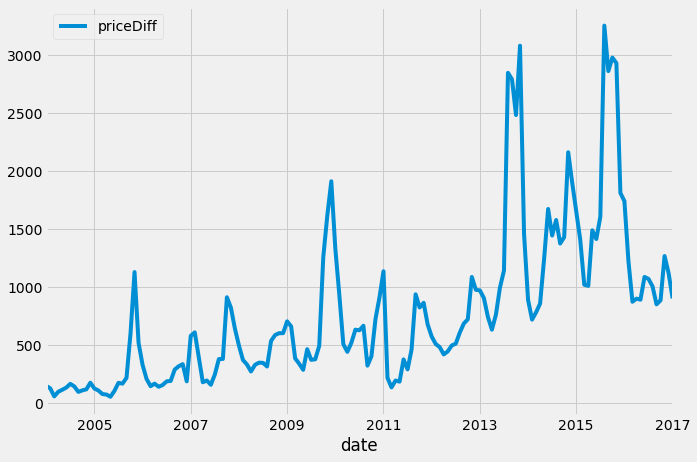

In [49]:
dfBang.plot(kind = 'line', y = 'priceDiff')

### PRINCIPLE: Pivot Table

Pivot table is a way to summarize data frame data into index (rows), columns and value 

![](../img/pivot.png)

In [50]:
# Create new variable for Integer Month
dfBang['monthVal'] = pd.DatetimeIndex(dfBang['date']).month

In [38]:
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,priceMinLog,priceMaxLog,priceModLog,priceDiff,monthVal
date,,,,,,,,,,,,,,,
2004-01,BANGALORE,January,2004,227832,916,1066,991,KT,BANGALORE,2004-01-01,6.820016,6.971669,6.898715,150,1
2004-02,BANGALORE,February,2004,225133,741,870,793,KT,BANGALORE,2004-02-01,6.608001,6.768493,6.675823,129,2
2004-03,BANGALORE,March,2004,221952,527,586,556,KT,BANGALORE,2004-03-01,6.267201,6.373320,6.320768,59,3
2004-04,BANGALORE,April,2004,185150,419,518,465,KT,BANGALORE,2004-04-01,6.037871,6.249975,6.142037,99,4
2004-05,BANGALORE,May,2004,137390,400,516,455,KT,BANGALORE,2004-05-01,5.991465,6.246107,6.120297,116,5


In [51]:
dfBangPivot = pd.pivot_table(dfBang, values = "priceDiff", 
                             columns = "year", index = "monthVal")

In [52]:
dfBangPivot

year,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
monthVal,,,,,,,,,,,,,,
1,150,127,331,581,497,706,1335,1138,575,973,892,1654,1743,904
2,129,110,209,611,373,663,934,218,511,907,721,1409,1226,NaN
3,59,79,147,398,334,387,509,137,484,745,784,1022,875,NaN
4,99,75,169,181,274,341,443,196,421,634,859,1012,902,NaN
5,116,56,142,196,331,288,521,186,447,764,1245,1491,893,NaN
6,135,107,157,159,350,466,634,378,498,997,1675,1416,1089,NaN
7,167,176,189,248,348,374,629,292,514,1143,1446,1608,1072,NaN
8,145,169,192,381,317,379,668,465,609,2849,1580,3256,1008,NaN
9,98,219,290,382,537,495,324,939,687,2793,1377,2864,853,NaN


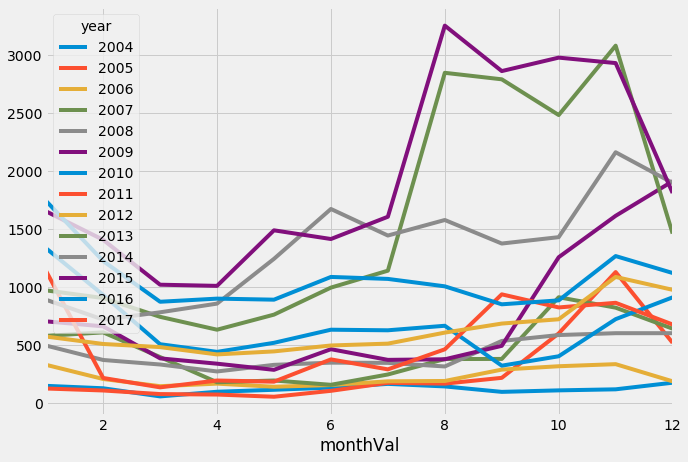

In [53]:
dfBangPivot.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cad47b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d165ac8>]], dtype=object)

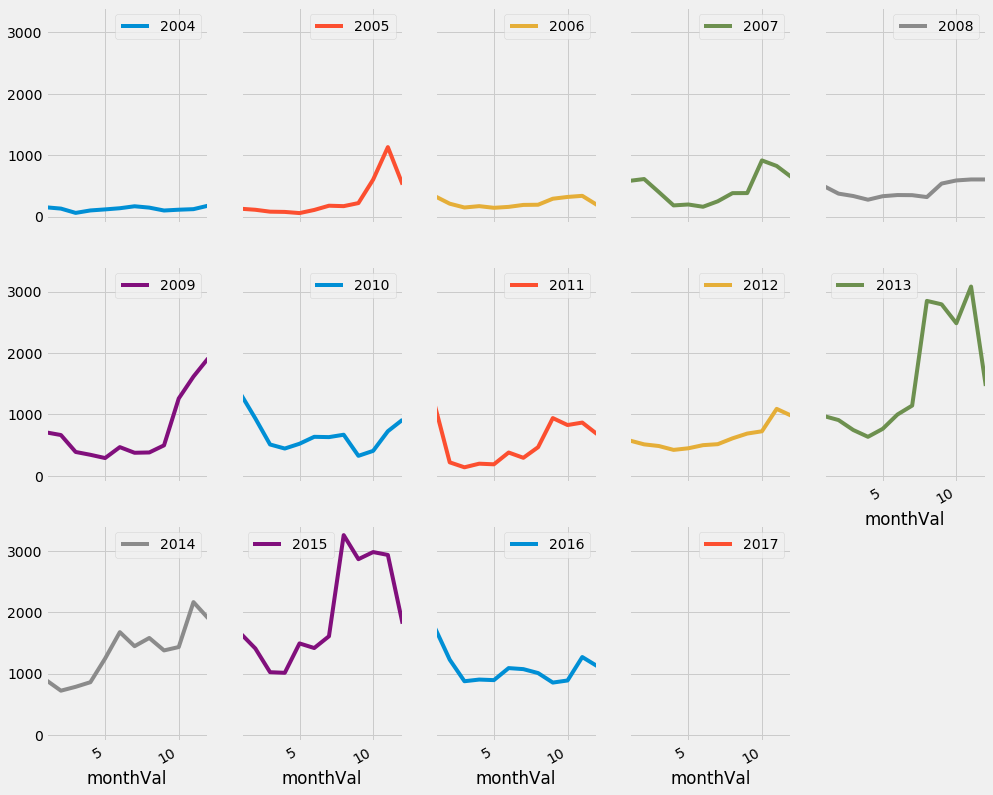

In [54]:
dfBangPivot.plot(subplots = True, figsize=(15, 15), layout=(3, 5), sharey=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d989f60>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11e194cf8>]], dtype=object)

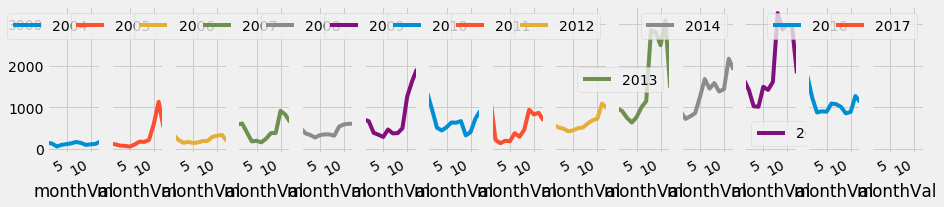

In [55]:
dfBangPivot.plot(subplots = True, figsize=(15, 3), layout=(1, 15), sharey=True)

### Exercise

Plot the price difference (priceMax - priceMin) for Delhi? 

In [86]:
dfBlrDelhi = df[(df.city == 'BANGALORE') | (df.city == 'DELHI')].copy()
dfBlrDelhi = dfBlrDelhi.sort_values(by = "date")
dfBlrDelhi['priceDiff'] = dfBlrDelhi['priceMax'] - dfBlrDelhi['priceMin']
dfBlrDelhi.index = pd.PeriodIndex(dfBang.date, freq='M')
dfBlrDelhi['monthVal'] = pd.DateTimeIndex(dfBlrDelhi['date']).month
pd.pivot_table(dfBlrDelhi, values = "priceDiff", columns = "city", index = "monthVal")
pd.plot()

ValueError: Length mismatch: Expected axis has 326 elements, new values have 157 elements